In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import integrate 
%matplotlib inline

In [3]:
# initial height= 30 meters 
data = np.loadtxt("droptower_vdata.txt", unpack=True)
print(data)
print(data[0])

[[  0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10. ]
 [ 15.   17.6   7.8  -2.  -11.8 -21.6 -19.   -4.   11.   13.6   3.8]]
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]


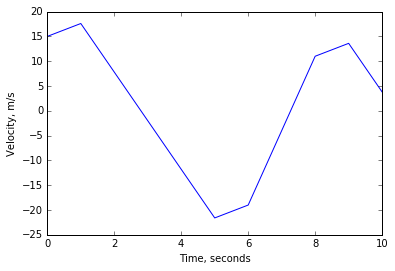

In [4]:
# plotting the velocity as a function of time is easy...
plt.plot(data[0], data[1])
plt.ylabel("Velocity, m/s")
plt.xlabel("Time, seconds")

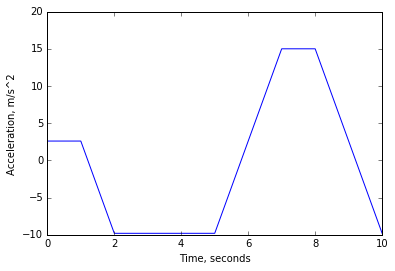

In [5]:
# compute acceleration, by differentiating velocity array 
accel = np.diff(data[1])
accel = np.insert(accel, 0, accel[0])
plt.plot(data[0], accel)
plt.ylim(-10, 20)
plt.xlabel("Time, seconds")
plt.ylabel("Acceleration, m/s^2")

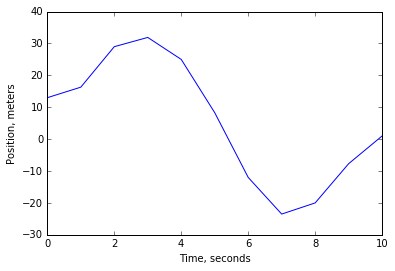

In [6]:
# compute position by integrating velocity 
# we have the initial condition y(t = 0) = 13 meters 
positions = integrate.cumtrapz(data[1], data[0]) 
positions = np.insert(positions, 0, 13) # insert initial condition 
plt.plot(data[0], positions)
plt.xlabel("Time, seconds")
plt.ylabel("Position, meters")

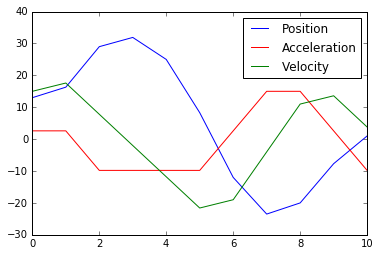

In [11]:
# let's plot all three on the same graph 
plt.plot(data[0], positions, color="blue", label="Position")
plt.plot(data[0], accel, color="red", label="Acceleration")
plt.plot(data[0], data[1], color="green", label="Velocity")
plt.legend()

In [34]:
# Part 2: Compute the average acceleration when the ride accelerates upwards 

# extract positive acceleration values from the array 
sort_accel = np.sort(accel)
sort_accel_pos = np.zeros(sort_accel.shape)
# add positive acceleration values to sort_accel_pos
for i in range(sort_accel.shape[0]):
    if sort_accel[i] > 0: 
        sort_accel_pos[i] = sort_accel[i] 
        
average_accel = np.mean(sort_accel_pos)
print("The average acceleration in m/s is: %f" %average_accel)

The average acceleration in m/s is: 3.672727
